The file below assumes that you are able to access the MCMC output from the 4 files (model0b.ipynb...model03.ipynb) run earlier. 

These will have been placed in a working directory. However, it is assumed here that you might have moved these directories into one of your choice and therefore this needs to be modified.



## Set the directories to save output and read files

In [2]:
dirout='C:\\Users\\aes05kgb\\OneDrive - University of Reading\\k\\Art\\risk\\Jan 2025\\plots\\' #to save the plots
dr='D:\Kelvin\Kel1\Risk\Pystan\papersummary\\'  #For the MCMC output

In [3]:
from prepare import *
from gambles import equalize_and_compress_and_sort as ecs
from gambles import dcumdist,cumdist

import matplotlib
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('legend', fontsize=12)
matplotlib.rc('font', **font)

saveplots=False   #Set to True if you want to save the files into your chosen directory

## Preliminary Code

In [4]:
a=r'$\alpha$';b=r'$\beta$';L=r'$\lambda$';
r=r'$\rho$';r1=r'$\rho_G$';r2=r'$\rho_L$';r3=r'$\rho_M$'
d1=r'$\delta_1$';d2=r'$\delta_2$'
g1=r'$\gamma_1$';g2=r'$\gamma_2$'
om1=r'$\omega_{1G}$';om2=r'$\omega_{2G}$';om3=r'$\omega_{1L}$';om4=r'$\omega_{2L}$'
pie1=r'$\pi_G$';pie2=r'$\pi_L$'
eta=r'$\eta$'


def pullthem(elements,names,z):
    W=[]
    j=0
    for e in elements:
        if e=='scale':
            E=exp(twodma(z[e]))
        else:
            E=twodma(z[e])
        #print(cols(E))
        if j==0:
            W=E
        else:
            W=cc([W,E])
        j=j+1    
    W=frame(W)
    W.columns=names
    return W


def remove(x,lst):
    for i in lst:
        x.remove(i)
        #print(x)
    return x

def join(a,b,c,d,n,pp=[]):
    if n==1:
       e=a.copy()
    elif n==2:
       e=a.copy()+b.copy()
    elif n==3:
       e=a.copy()+b.copy()+c.copy()
    elif n==4:
       e=a.copy()+b.copy()+c.copy()+d.copy()
    e=remove(e,pp)
    return e


def labelsf(labels,dom='All',n=4):
    if dom.lower()=='all':
       lab=labels[0]
       names=join(lab[0],lab[1],lab[2],lab[3],n)
    elif dom.lower()=='m':
       lab=labels[1]
       names=join(lab[0],lab[1],lab[2],lab[3],n,[lab[0][2],lab[0][3],lab[0][4]]) 
    elif dom.lower()=='lg':
       lab=labels[2]
       names=join(lab[0],lab[1],lab[2],lab[3],n,[lab[0][4]]) 
    return names


def paramsf(parameters,dom='All',n=3):
    lab=parameters
    if dom.lower()=='all':
       names=join(lab[0],lab[1],lab[2],lab[3],n)
    elif dom.lower()=='m':
       names=join(lab[0],lab[1],lab[2],n,lab[3],['lamda']) 
    elif dom.lower()=='lg':
       names=join(lab[0],lab[1],lab[2],lab[3],n) 
    return names

param0=['alpha','beta','lamda','scale','delta1','delta2','gama1','gama2']
omega=['omega1','omega2','omega3','omega4']  #The parameters that change the value function
stbs=['stbg','stbl'] #what is reffered to as pie
veta=['com']         #what is reffered to as eta

parameters=[param0,omega,stbs,veta]

Param0=[a,b,L,r1,r2,r3,d1,d2,g1,g2]
Omega=[om1,om2,om3,om4]
Stbs=[pie1,pie2]
Eta=[eta]
labels_0=[Param0,Omega,Stbs,Eta]


labels=[labels_0,[],[]]

def calls(name,parameters,labels,n=2,dom='all',logged=True):
    z=loadmodel(name)
    if logged:
        z['lamda']=exp(z['lamda'])
    lab=labelsf(labels,n=n,dom=dom)
    prm=paramsf(parameters,n=n,dom=dom)
    meanout=pullthem(prm,lab,z)
    out=rc([frame(meanout.mean()).T,frame(meanout.std()).T]).round(3)
    return z,meanout,out

## Read in the 4 sets of MCMC from the models that you have run

In [5]:

z0,m0,o0=calls(dr+'model0bmcmc',parameters,labels,n=1,dom='all',)
z1,m1,o1=calls(dr+'model1bmcmc',parameters,labels,n=2,dom='all',)
z2,m2,o2=calls(dr+'model2bmcmc',parameters,labels,n=3,dom='all')
z3,m3,o3=calls(dr+'model3bmcmc',parameters,labels,n=4,dom='all')


Below it appends in the four elements it needs for summary

In [6]:
df=o0                    #The standard model
#df=df.append(o1)        #Model 1
#df=df.append(o2)        #Model 2
#df=df.append(o3)        #Model 3

df=pd.concat([df,o1],axis=0)
df=pd.concat([df,o2],axis=0)
df=pd.concat([df,o3],axis=0)

df.index=['M0 Mean','M0 Sd','M1 Mean','M1 Sd','M2 Mean','M2 Sd','M3 Mean','M3 Sd']

colsdf=df.columns
df.T

,M0 Mean,M0 Sd,M1 Mean,M1 Sd,M2 Mean,M2 Sd,M3 Mean,M3 Sd
$\alpha$,0.835,0.027,0.722,0.040,0.722,0.041,0.742,0.049
$\beta$,1.130,0.033,1.084,0.040,0.985,0.048,0.982,0.049
$\lambda$,0.484,0.062,0.393,0.065,0.547,0.103,0.575,0.124
$\rho_G$,0.656,0.097,0.934,0.154,0.832,0.141,0.785,0.146
$\rho_L$,0.337,0.036,0.492,0.069,0.451,0.066,0.484,0.083
$\rho_M$,0.436,0.040,0.594,0.076,0.618,0.082,0.599,0.095
$\delta_1$,1.674,0.065,1.705,0.067,1.601,0.076,1.583,0.076
$\delta_2$,1.133,0.051,1.113,0.053,1.221,0.066,1.233,0.064
$\gamma_1$,0.927,0.039,0.978,0.044,0.913,0.052,0.890,0.051
$\gamma_2$,1.103,0.038,1.045,0.040,1.101,0.054,1.133,0.055


## The WAIC diagnostics for model comparison

In [7]:
W0=WAICf(z0['log_lik'])
W1=WAICf(z1['log_lik'])
W2=WAICf(z2['log_lik'])
W3=WAICf(z3['log_lik'])


In [8]:
df['WAIC']=[float(W0[0]['waic']),float(W0[0]['se_waic']),
            float(W1[0]['waic']),float(W1[0]['se_waic']),
            float(W2[0]['waic']),float(W2[0]['se_waic']),
            float(W3[0]['waic']),float(W3[0]['se_waic'])]

In [9]:
c1_0=comparewaic(z1['log_lik'],z0['log_lik'])
c2_1=comparewaic(z2['log_lik'],z1['log_lik'])
c3_2=comparewaic(z3['log_lik'],z2['log_lik'])



A negative value favours the first model
A negative value favours the first model
A negative value favours the first model


In [10]:
dw1=2*c1_0
dw1=pd.concat([dw1,2*c2_1])
dw1=pd.concat([dw1,2*c3_2])


INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [11]:
dw1.index=['M0 v M1','M1 v M2','M2 v M3']
dw1.columns=['Diff WAIC', 'Se Diff WAIC']

In [12]:
dw1

,Diff WAIC,Se Diff WAIC
M0 v M1,-31.671443,13.608508
M1 v M2,-76.837937,18.256918
M2 v M3,-11.089495,15.565876


## Generating the Graphs in the Paper

In [13]:
from shortercuts import pltsize,plt
import matplotlib
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18}
plt.rc('legend', fontsize=18)
matplotlib.rc('font', **font)
import seaborn as sns
sns.set_style("dark")

In [14]:
def getq(m,a):
    return [m[a].quantile([.975,.025])[0.975]-m[a].mean(),m[a].mean()-m[a].quantile([.975,.025])[0.025]]
    
def construct_errors(s):
    q0=getq(m0,s)
    q1=getq(m1,s)
    q2=getq(m2,s)
    q3=getq(m3,s)
    
    errorsv = [q0,q1,q3,q3]
    e1=[i[0] for i in errorsv]
    e2=[i[1] for i in errorsv]
    errors=[e1,e2]
    return errors
    


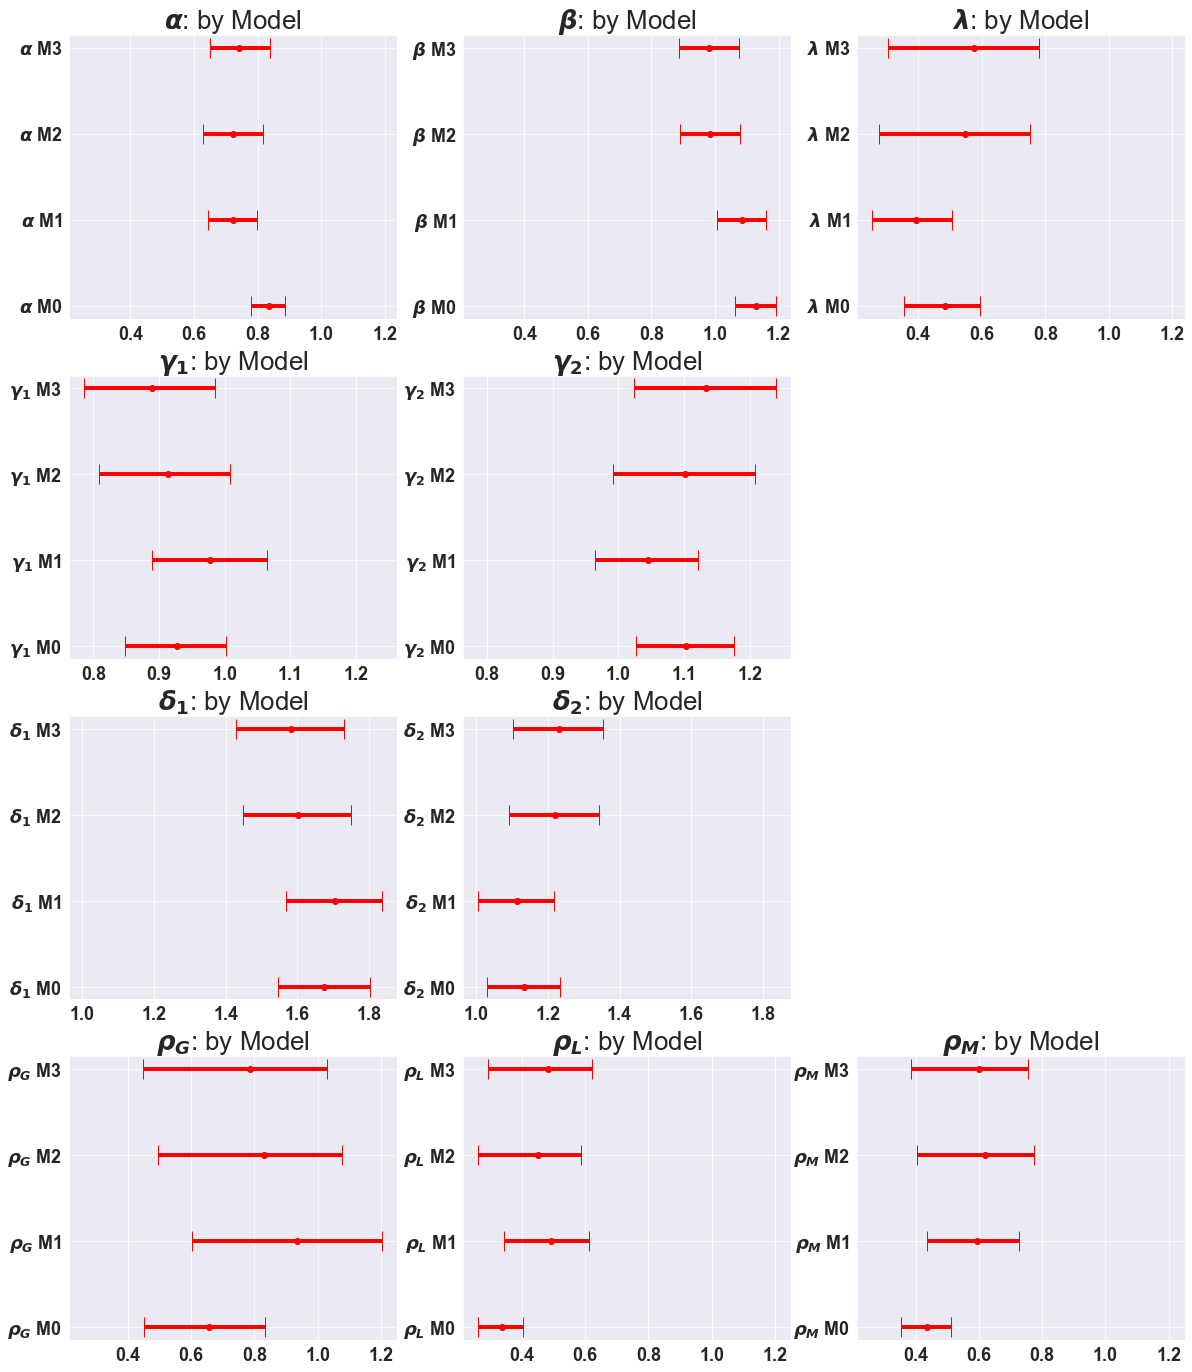

In [15]:
pltsize(24,20)
import matplotlib.pyplot as plt

def do(df):
    return float(df.mean())
def so(df):
    return float(df.std())
linew=4
f=2

tit=': by Model'
fig,ax=plt.subplots(4,3,sharex='row')
s=a
x = [do(m0[s]),do(m1[s]),do(m2[s]),do(m3[s])]
y = range(len(x))
errors=construct_errors(s)

yticks=[s+' M0', s+' M1', s+' M2',s+' M3']
s1x=ax[0,0]
#s1x.set_xlim(.5,1.5)
s1x.errorbar(x, yticks, xerr=errors, fmt = 'o', color = 'r', elinewidth=linew,capsize=10)
s1x.grid()
s1x.set_title(s+ tit)

s=b
x = [do(m0[s]),do(m1[s]),do(m2[s]),do(m3[s])]
y = range(len(x))
errors=construct_errors(s)

yticks=[s+' M0', s+' M1', s+' M2',s+' M3']
s1x=ax[0,1]
s1x.errorbar(x, yticks, xerr=errors, fmt = 'o', color = 'r', elinewidth=linew,capsize=10)
s1x.grid()
s1x.set_title(s + tit)

s=L
x = [do(m0[s]),do(m1[s]),do(m2[s]),do(m3[s])]
y = range(len(x))
errors=construct_errors(s)

yticks=[s+' M0', s+' M1', s+' M2',s+' M3']
s1x=ax[0,2]
s1x.errorbar(x, yticks, xerr=errors, fmt = 'o', color = 'r', elinewidth=linew,capsize=10)
s1x.grid()
s1x.set_title(s + tit)


s=g1
x = [do(m0[s]),do(m1[s]),do(m2[s]),do(m3[s])]
y = range(len(x))
errors=construct_errors(s)
yticks=[s+' M0', s+' M1', s+' M2',s+' M3']
s1x=ax[1,0]
s1x.errorbar(x, yticks, xerr=errors, fmt = 'o', color = 'r', elinewidth=linew,capsize=10)
s1x.grid()
s1x.set_title(s + tit)

s=g2
x = [do(m0[s]),do(m1[s]),do(m2[s]),do(m3[s])]
y = range(len(x))
errors=construct_errors(s)
yticks=[s+' M0', s+' M1', s+' M2',s+' M3']
s1x=ax[1,1]
s1x.errorbar(x, yticks, xerr=errors, fmt = 'o', color = 'r', elinewidth=linew,capsize=10)
s1x.grid()
s1x.set_title(s + tit)

s=d1
x = [do(m0[s]),do(m1[s]),do(m2[s]),do(m3[s])]
y = range(len(x))
errors=construct_errors(s)
yticks=[s+' M0', s+' M1', s+' M2',s+' M3']
s1x=ax[2,0]
s1x.errorbar(x, yticks, xerr=errors, fmt = 'o', color = 'r', elinewidth=linew,capsize=10)
s1x.grid()
s1x.set_title(s + tit)

s=d2
x = [do(m0[s]),do(m1[s]),do(m2[s]),do(m3[s])]
y = range(len(x))
errors=construct_errors(s)
yticks=[s+' M0', s+' M1', s+' M2',s+' M3']
s1x=ax[2,1]
s1x.errorbar(x, yticks, xerr=errors, fmt = 'o', color = 'r', elinewidth=linew,capsize=10)
s1x.grid()
s1x.set_title(s + tit)

s=r1
x = [do(m0[s]),do(m1[s]),do(m2[s]),do(m3[s])]
y = range(len(x))
errors=construct_errors(s)
yticks=[s+' M0', s+' M1', s+' M2',s+' M3']
s1x=ax[3,0]
s1x.errorbar(x, yticks, xerr=errors, fmt = 'o', color = 'r', elinewidth=linew,capsize=10)
s1x.grid()
s1x.set_title(s + tit)

s=r2
x = [do(m0[s]),do(m1[s]),do(m2[s]),do(m3[s])]
y = range(len(x))
errors=construct_errors(s)
yticks=[s+' M0', s+' M1', s+' M2',s+' M3']
s1x=ax[3,1]
s1x.errorbar(x, yticks, xerr=errors, fmt = 'o', color = 'r', elinewidth=linew,capsize=10)
s1x.grid()
s1x.set_title(s + tit)

s=r3
x = [do(m0[s]),do(m1[s]),do(m2[s]),do(m3[s])]
y = range(len(x))
errors=construct_errors(s)
yticks=[s+' M0', s+' M1', s+' M2',s+' M3']
s1x=ax[3,2]
s1x.errorbar(x, yticks, xerr=errors, fmt = 'o', color = 'r', elinewidth=linew,capsize=10)
s1x.grid()
s1x.set_title(s + tit)
plt.delaxes(ax[1,2])
plt.delaxes(ax[2,2])

if saveplots:
    plt.savefig(dirout+'Fig2.png',facecolor=fig.get_facecolor())

In [16]:
def prelec2(d1,d2,x='',reverse=False):
    n=100
    if x=='':
        if reverse==False:
            x=np.linspace(0,1,n)
        else:
            x=np.linspace(1,0,n)
        x_=np.linspace(0,1,n)
        z=exp(-d2*((-ln(x))**d1));
        if reverse:
            z=1-z
        z=frame(z)
        z.index=x_
    return frame(z)
    

def Ut(x,a=1,b=1,lamda=1): 
    if x>0:
        u=x**a
    else:
        u=-lamda*(-x)**b
    return u

def Uf(x,a=1,b=1,lamda=1,om1=0,om2=1,om3=0,om4=1): 
    
    if x>0:
        u=x**a
        u=float(u/(1+om1*exp(-om2*x)))
    else:
        u=-lamda*(-x)**b
        u=float(u/(1+om3*exp(om4*x)))
    return u

def derU(x,a=1,b=1,lamda=1,om1=0,om2=1,om3=0,om4=1):
    if x>=0:
       phi=float(1/(1+om1*exp(-om2*x))) 
       alpha,omega2=a,om2
    else:
       phi=float(1/(1+om3*exp(om4*x)))
       alpha,omega2=b, om4
    #u=Uf(x,a=a,b=b,lamda=lamda,om1=om1,om2=om2,om3=om3,om4=om4)
    
    dphi=phi*(1-phi)*omega2
    ddphi=dphi*(1-phi)*omega2-phi*dphi*omega2
    
    z=abs(x)
    if z !=0:
        du=phi*alpha*z**(alpha-1)+dphi*z**alpha
        ddu=phi*alpha*(alpha-1)*z**(alpha-2)+ dphi*alpha*z**(alpha-1)+ddphi*z**alpha+ dphi*alpha*z**(alpha-1)
    else:
        du,ddu=10**-6,10**-6
    
    if x>=0:
        r=-z*ddu/(du)
    else:
        r=z*ddu/(du)
    return r


Text(0.5, 0.98, 'The Value Functions')

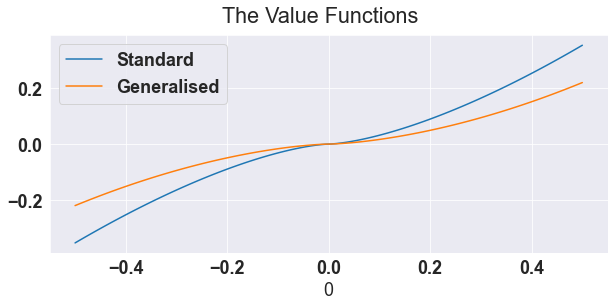

In [17]:
import numpy as np
m=.5
X=np.linspace(-m,m,100)
a_=1.5
b_=1.5
U,V=[],[]
for x in X:
    U+=[[x,Uf(x,a=a_,b=b_,lamda=1,om1=0,om2=1,om3=0,om4=1)]]
    V+=[[x,Uf(x,a=a_,b=b_,lamda=1,om1=1,om2=1,om3=1,om4=1)]]
U,V=frame(U),frame(V)
U.index,V.index=U[0],V[0]
U,V=U.drop(0,axis=1),V.drop(0,axis=1)
U.columns,V.columns=['Standard'],['Generalised']
pltsize(4,10)
fig,ax=plt.subplots()
U.plot(grid=True,ax=ax)
V.plot(grid=True,ax=ax)
fig.suptitle('The Value Functions')

In [18]:
ge1=float(o0[[g1,g2,d1,d2]].iloc[0][0])
ge2=float(o0[[g1,g2,d1,d2]].iloc[0][1])

de1=float(o0[[g1,g2,d1,d2]].iloc[0][2])
de2=float(o0[[g1,g2,d1,d2]].iloc[0][3])

prob1=prelec2(ge1,ge2,reverse=True)
prob2=prelec2(de1,de2)

prob=cc([prob1,prob2])
prob.columns=['Gain','Loss']


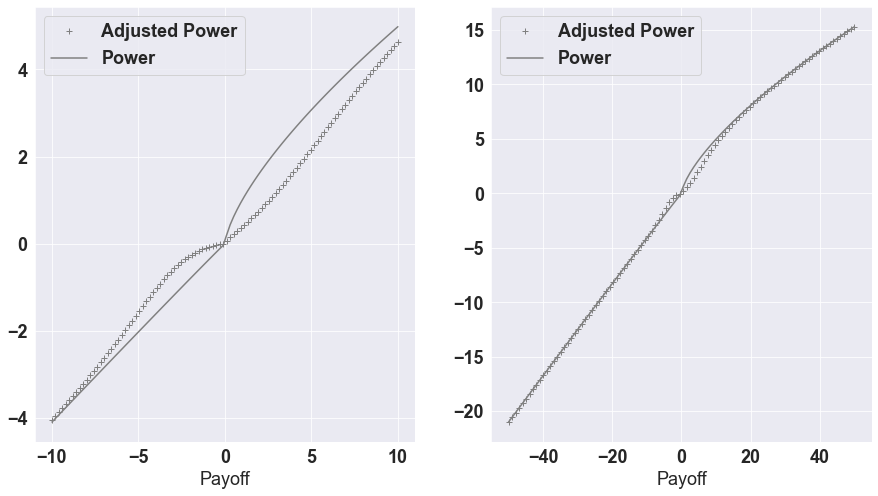

In [19]:
def gf(Q,rest=True,r=10):
    N=rows(Q)
    for j in range(1000):
        A=Q[a].iloc[j]
        B=Q[b].iloc[j]
        LaA=Q[L].iloc[j]

        if rest:
            OM1,OM2,OM3,OM4=0,1,0,1
        else:
            OM1,OM2,OM3,OM4=Q[om1].iloc[j],Q[om2].iloc[j],Q[om3].iloc[j],Q[om4].iloc[j]
        U=[]
        for i in np.linspace(-r,r,100):
            U+=[[i,Uf(i,A,B,LaA,om1=OM1,om2=OM2,om3=OM3,om4=OM4)]]
        
        U=frame(U)
        U.index=U[0]
        U=U.drop(0,axis=1)
    
        if j==0:
            AU=U
        else:
            AU=cc([AU,U])
        return AU



AU1=gf(m3,rest=False)
AU2=gf(m3,rest=True)
both=cc([AU1.T.mean(),AU2.T.mean()])
both.columns=['Adjusted Power','Power']

AU1=gf(m3,rest=False,r=50)
AU2=gf(m3,rest=True,r=50)
both2=cc([AU1.T.mean(),AU2.T.mean()])
both2.columns=['Adjusted Power','Power']

both.index.name='Payoff'
both2.index.name='Payoff'
pltsize(8,15)
fig,ax=plt.subplots(1,2)

both.plot(grid=True,ax=ax[0],color='grey',style=['+','-'])
both2.plot(grid=True,ax=ax[1],color='grey',style=['+','-'])

if saveplots:
    plt.savefig(dirout+'Fig3.png')

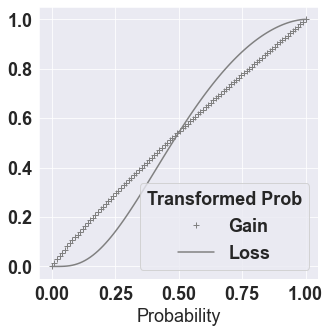

In [20]:
pltsize(5,5)
prob=frame(prob)
prob.index.name='Probability'
prob.columns.name='Transformed Prob'

frame(prob).plot(grid=True,color='grey',style=['+','-','--','--'],title='')

if saveplots:
    plt.savefig(dirout+'Fig5a.png',facecolor=fig.get_facecolor())

In [21]:
z=z3
alpha_=z['alpha_']
beta_=z['beta_']
lamda_=z['lamda_']
gama1_=z['gama1_']
gama2_=z['gama2_']

delta1_=z['delta1_']
delta2_=z['delta2_']

#rho1_=z['scale_']



pie1_=z['stbg_']
pie2_=z['stbl_']

com_=z['com_']
scale_=z['scale_']

In [22]:
individual=cc([frame(alpha_).mean(),
             frame(beta_).mean(),
              frame(lamda_).mean(),
              frame(exp(scale_[:,:,0])).mean(),
              frame(exp(scale_[:,:,1])).mean(),
              frame(exp(scale_[:,:,2])).mean(),
              frame(delta1_).mean(),
              frame(delta2_).mean(),
              frame(gama1_).mean(),
              frame(gama2_).mean(),
              
              frame(pie1_).mean(),
              frame(pie2_).mean(),
              frame(com_).mean()
                
              ])

m=[a,b,L,r1,r2,r3,d1,d2,g1,g2,pie1,pie2,eta]

individual.columns=m

In [23]:
df=frame([individual.std(),individual.mean(),
       individual.min(),   
       individual.quantile(0.05),individual.quantile(0.25),
       individual.quantile (0.5),
       individual.quantile(0.75), individual.quantile(0.95),
       individual.max()  ])

col=list(df.index)
col[0]='Stdv'
col[1]='Min'
col[7]='Max'

df.index=col

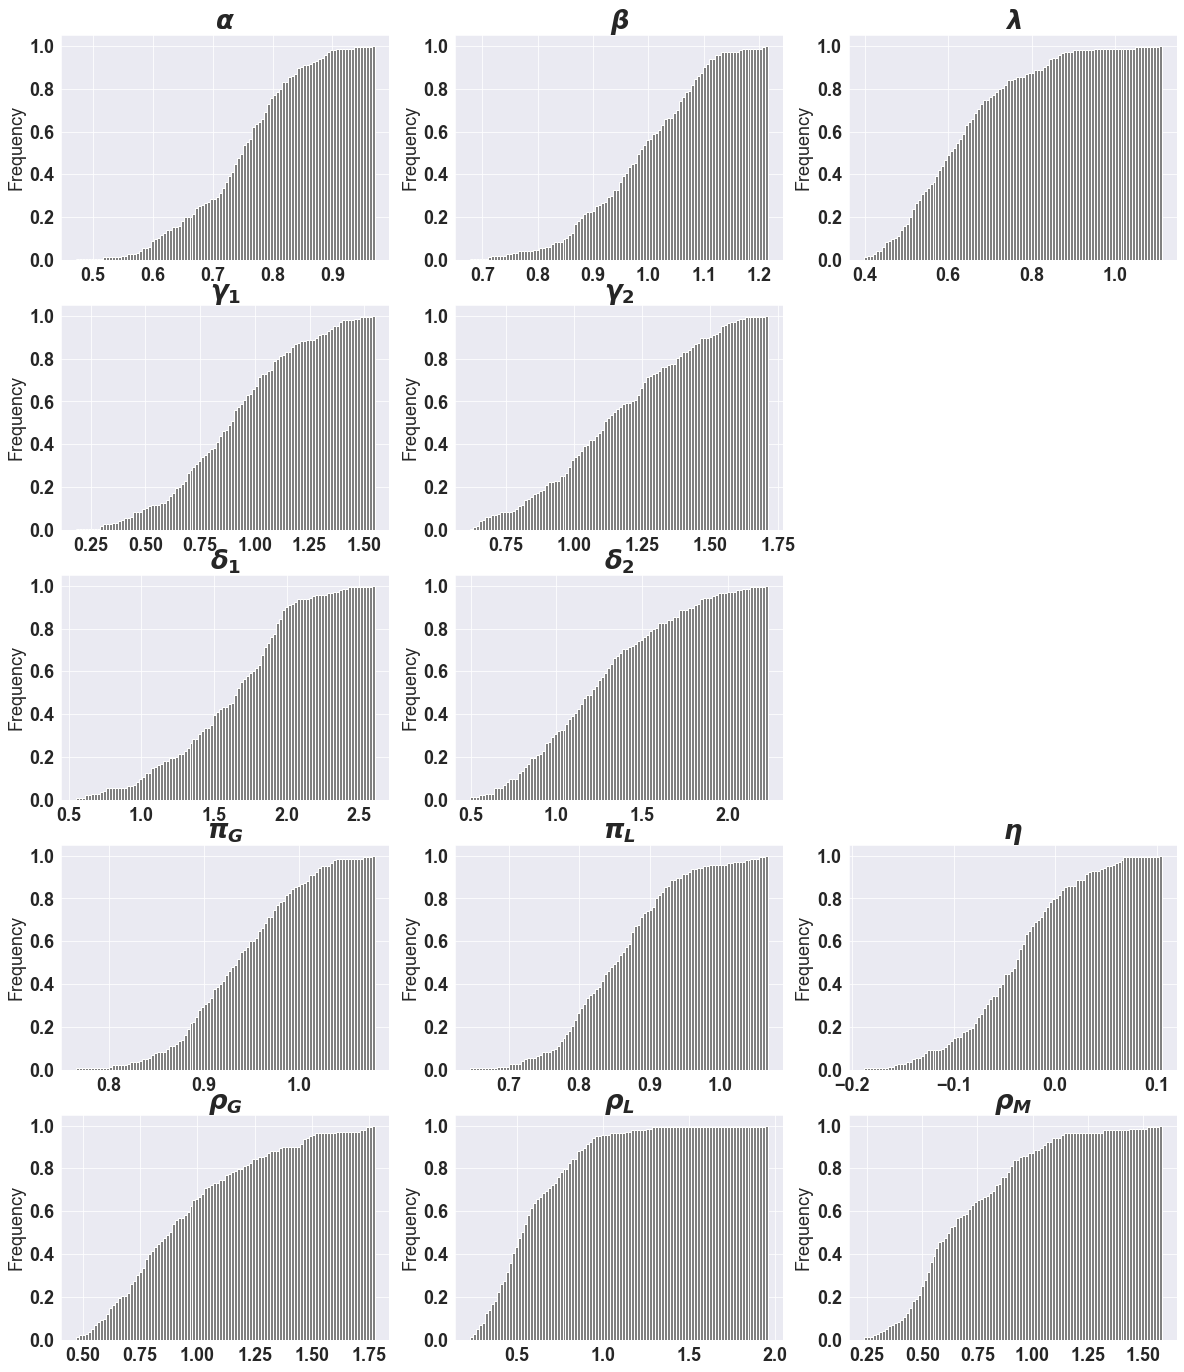

In [24]:
pltsize(24,20)
Cum=True
dens=True
fig,ax=plt.subplots(5,3)
frame(alpha_).mean().plot(kind='hist',grid=True,bins=100,ax=ax[0,0],title=a,cumulative=Cum,density=dens,color='gray')
frame(beta_).mean().plot(kind='hist',grid=True,bins=100,ax=ax[0,1],title=b,cumulative=Cum,density=dens,color='gray')
frame(lamda_).mean().plot(kind='hist',grid=True,bins=100,ax=ax[0,2],title=L,cumulative=Cum,density=dens,color='gray')

frame(gama1_).mean().plot(kind='hist',grid=True,bins=100,ax=ax[1,0],title=g1,cumulative=Cum,density=dens,color='gray')
frame(gama2_).mean().plot(kind='hist',grid=True,bins=100,ax=ax[1,1],title=g2,cumulative=Cum,density=dens,color='gray')
frame(delta1_).mean().plot(kind='hist',grid=True,bins=100,ax=ax[2,0],title=d1,cumulative=Cum,density=dens,color='gray')
frame(delta2_).mean().plot(kind='hist',grid=True,bins=100,ax=ax[2,1],title=d2,cumulative=Cum,density=dens,color='gray')

frame(pie1_).mean().plot(kind='hist',grid=True,bins=100,ax=ax[3,0],title=pie1,cumulative=Cum,density=dens,color='gray')
frame(pie2_).mean().plot(kind='hist',grid=True,bins=100,ax=ax[3,1],title=pie2,cumulative=Cum,density=dens,color='gray')
frame(com_).mean().plot(kind='hist',grid=True,bins=100,ax=ax[3,2],title=eta,cumulative=Cum,density=dens,color='gray')

frame(exp(scale_[:,:,0])).mean().plot(kind='hist',grid=True,bins=100,ax=ax[4,0],title=r1,cumulative=Cum,density=dens,color='gray')
frame(exp(scale_[:,:,1])).mean().plot(kind='hist',grid=True,bins=100,ax=ax[4,1],title=r2,cumulative=Cum,density=dens,color='gray')
frame(exp(scale_[:,:,2])).mean().plot(kind='hist',grid=True,bins=100,ax=ax[4,2],title=r3,cumulative=Cum,density=dens,color='gray')

plt.delaxes(ax[1,2])
plt.delaxes(ax[2,2])
#plt.savefig('C:\\k\\Art\\risk\\entropydesign\\plots\\Fig5.png',facecolor=fig.get_facecolor())

if saveplots:
    plt.savefig(dirout+'Fig7.png',facecolor=fig.get_facecolor())    

In [25]:
params=cc([frame(alpha_).mean(),frame(beta_).mean(),frame(lamda_).mean(),
           frame(gama1_).mean(),frame(gama2_).mean(),
           frame(delta1_).mean(),frame(delta2_).mean(),frame(pie1_).mean(),frame(pie2_).mean()])
params.columns=[a,b,L,g1,g2,d1,d2,pie1,pie2]

In [26]:
Q=params[[b,pie2,d1,d2]]
s1=Q[b]>1
s2=Q[pie2]<1
s3=Q[d1]>1
s4=Q[d2]>1
[sum(s1),sum(s3&s4),sum(s1&s3&s4),sum(s1&s4),sum(s1&s3)]

[64, 94, 39, 41, 57]

In [27]:
params.corr()

,$\alpha$,$\beta$,$\lambda$,$\gamma_1$,$\gamma_2$,$\delta_1$,$\delta_2$,$\pi_G$,$\pi_L$
$\alpha$,1.000000,0.087666,-0.049925,0.002995,-0.199184,-0.048954,-0.051079,0.110950,0.025077
$\beta$,0.087666,1.000000,0.343364,0.172300,0.070658,0.234903,-0.266289,-0.045769,-0.272219
$\lambda$,-0.049925,0.343364,1.000000,0.299786,0.114506,0.076228,0.304170,-0.180364,0.177703
$\gamma_1$,0.002995,0.172300,0.299786,1.000000,0.221215,0.425425,0.403582,-0.393393,-0.102829
$\gamma_2$,-0.199184,0.070658,0.114506,0.221215,1.000000,0.334053,0.057783,0.412879,-0.239280
$\delta_1$,-0.048954,0.234903,0.076228,0.425425,0.334053,1.000000,0.385055,-0.110266,-0.356446
$\delta_2$,-0.051079,-0.266289,0.304170,0.403582,0.057783,0.385055,1.000000,-0.235649,0.227550
$\pi_G$,0.110950,-0.045769,-0.180364,-0.393393,0.412879,-0.110266,-0.235649,1.000000,-0.090420
$\pi_L$,0.025077,-0.272219,0.177703,-0.102829,-0.239280,-0.356446,0.227550,-0.090420,1.000000


In [28]:
pltsize(8,15)

Q=params

N=rows(Q)
for j in range(N):
    A=Q[a].iloc[j]
    B=Q[b].iloc[j]
    LaA=Q[L].iloc[j]

    OM1=1.5
    OM2=.4
    OM3=5
    OM4=.55
    U=[]
    for i in np.linspace(-50,50,100):
        U=U+[[i,Uf(i,A,B,LaA,om1=OM1,om2=OM2,om3=OM3,om4=OM4)]]
    
    
    U=frame(U)
    U.index=U[0]
    U=U.drop(0,axis=1)

    if j==0:
        AU=U
    else:
        AU=cc([AU,U])

AU1=AU



<AxesSubplot:title={'center':'Value Functions'}, xlabel='0'>

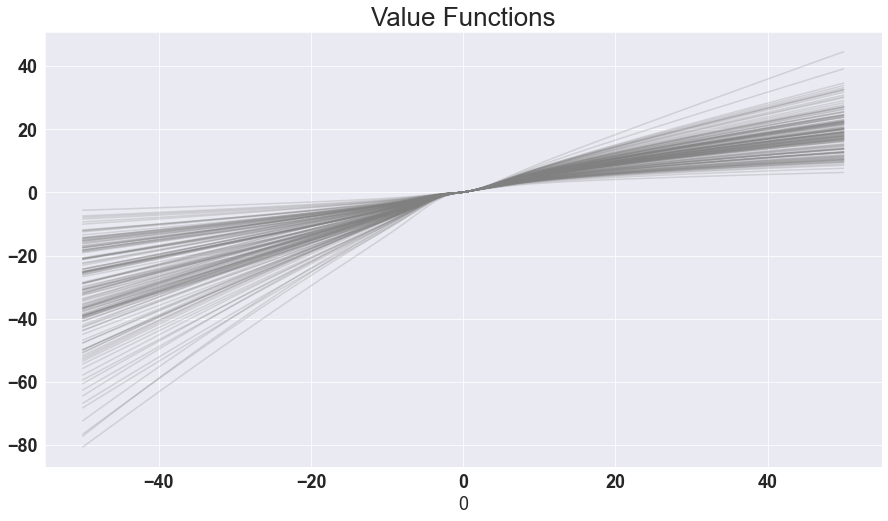

In [29]:
AU1.plot(legend=False,color='grey',grid=True,title='Value Functions',alpha=.25)

In [30]:
prob1=twodma(prelec2(ge1,ge2))
prob2=twodma(prelec2(de1,de2))
prob0=prelec2(1,1)
prob=frame(cc([prob1,prob2,twodma(prob0)]))
#prob.index=prob0
prob.columns=['Gain','Loss','Linear']


38
11
58
36


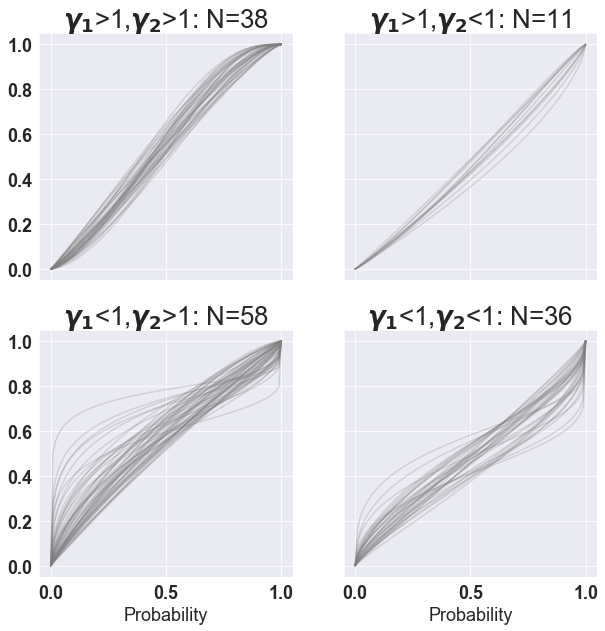

In [31]:
pltsize(10,10)
fig,ax=plt.subplots(2,2,sharex=True,sharey=True)


s1,s2,s3,s4=0,0,0,0
for i in range(143):
    if float(Q[g1].iloc[i])>1 and float(Q[g2].iloc[i])>1:
         s1=s1+1
    if float(Q[g1].iloc[i])>1 and float(Q[g2].iloc[i])<1:
         s2=s2+1
    if float(Q[g1].iloc[i])<1 and float(Q[g2].iloc[i])>1:
         s3=s3+1
    if float(Q[g1].iloc[i])<1 and float(Q[g2].iloc[i])<1:
         s4=s4+1

S=[s1,s2,s3,s4]
  

s=0
for i in range(143):
    if float(Q[g1].iloc[i])>1 and float(Q[g2].iloc[i])>1:
        frame(prelec2( float(Q[g1].iloc[i]), float(Q[g2].iloc[i] ) ,reverse=True)).plot(ax=ax[0,0],legend=False,color='grey',grid=True,alpha=.25
                                                                                        ,title=g1+'>1,'+ g2+'>1: N='+ str(S[0]))
        s=s+1
print(s)
s=0
for i in range(143):
    if float(Q[g1].iloc[i])>1 and float(Q[g2].iloc[i])<1:
        frame(prelec2( float(Q[g1].iloc[i]), float(Q[g2].iloc[i] ) ,reverse=True)).plot(ax=ax[0,1],legend=False,color='grey',grid=True,alpha=.25
                                                                                        ,title=g1+'>1,'+ g2+'<1: N='+ str(S[1]))
        s=s+1
print(s)
s=0        
for i in range(143):
    if float(Q[g1].iloc[i])<1 and float(Q[g2].iloc[i])>1:
        dfp=frame(prelec2( float(Q[g1].iloc[i]), float(Q[g2].iloc[i] ) ,reverse=True))
        dfp.index.name='Probability'
        dfp.plot(ax=ax[1,0],legend=False,color='grey',grid=True,alpha=.25
                                                                                      ,title=g1+'<1,'+ g2+'>1: N='+ str(S[2]))
        s=s+1
        
print(s)
s=0        
for i in range(143):
    if float(Q[g1].iloc[i])<1 and float(Q[g2].iloc[i])<1:
        dfp=frame(prelec2( float(Q[g1].iloc[i]), float(Q[g2].iloc[i] ) ,reverse=True))
        dfp.index.name='Probability'
        dfp.plot(ax=ax[1,1],legend=False,color='grey',grid=True,alpha=.25
                                                                                        ,title=g1+'<1,'+ g2+'<1: N='+ str(S[3]))
        
        s=s+1
print(s)        

if saveplots:
    plt.savefig(dirout+'Fig8a.png',facecolor=fig.get_facecolor())    

94
35
5
9


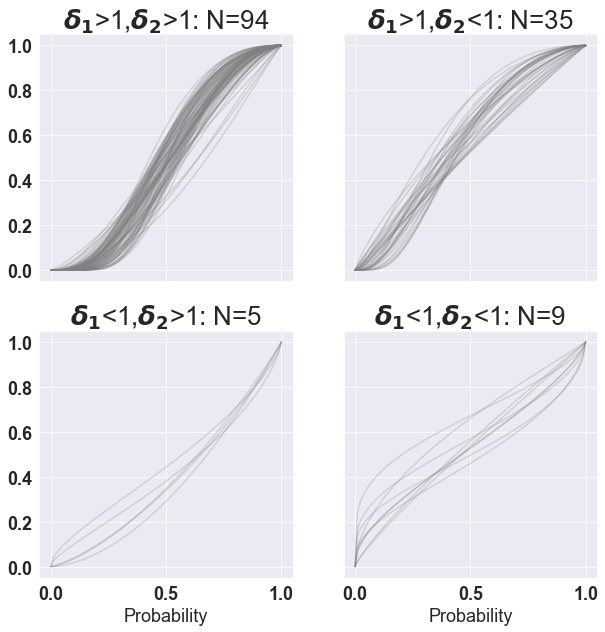

In [32]:
fig,ax=plt.subplots(2,2,sharex=True,sharey=True)
s1,s2,s3,s4=0,0,0,0
for i in range(143):
    if float(Q[d1].iloc[i])>1 and float(Q[d2].iloc[i])>1:
         s1+=1
    if float(Q[d1].iloc[i])>1 and float(Q[d2].iloc[i])<1:
         s2+=1
    if float(Q[d1].iloc[i])<1 and float(Q[d2].iloc[i])>1:
         s3+=1
    if float(Q[d1].iloc[i])<1 and float(Q[d2].iloc[i])<1:
         s4+=1

S=[s1,s2,s3,s4]

s=0
for i in range(143):
    if float(Q[d1].iloc[i])>1 and float(Q[d2].iloc[i])>1:
        frame(prelec2( float(Q[d1].iloc[i]), float(Q[d2].iloc[i] ) ,reverse=False)).plot(ax=ax[0,0],legend=False,color='grey',grid=True,alpha=.25
                                                                                          ,title=d1+'>1,'+ d2+'>1: N='+ str(S[0]))
        s=s+1
print(s)
s=0
for i in range(143):
    if float(Q[d1].iloc[i])>1 and float(Q[d2].iloc[i])<1:
        frame(prelec2( float(Q[d1].iloc[i]), float(Q[d2].iloc[i] ) )).plot(ax=ax[0,1],legend=False,color='grey',grid=True,alpha=.25
                                                                          ,title=d1+'>1,'+ d2+'<1: N='+ str(S[1]))
        s=s+1
print(s)
s=0
for i in range(143):
    if float(Q[d1].iloc[i])<1 and float(Q[d2].iloc[i])>1:
        dfp=frame(prelec2( float(Q[d1].iloc[i]), float(Q[d2].iloc[i] ) ))
        dfp.index.name='Probability'
        dfp.plot(ax=ax[1,0],legend=False,color='grey',grid=True,alpha=.25
                                                                          ,title=d1+'<1,'+ d2+'>1: N='+ str(S[2]))
        s=s+1
print(s)
s=0

for i in range(143):
    if float(Q[d1].iloc[i])<1 and float(Q[d2].iloc[i])<1:
        dfp=frame(prelec2( float(Q[d1].iloc[i]), float(Q[d2].iloc[i] ) ))
        dfp.index.name='Probability'
        dfp.plot(ax=ax[1,1],legend=False,color='grey',grid=True,alpha=.25
                                                                         ,title=d1+'<1,'+ d2+'<1: N='+ str(S[3]) )
        s=s+1
print(s)

if saveplots:
    plt.savefig(dirout+'Fig8b.png',facecolor=fig.get_facecolor())    

In [33]:
def prelec2(d1,d2,x='',reverse=False):
    n=100
    if x=='':
        if reverse==False:
            x=np.linspace(0,1,n)
        else:
            x=np.linspace(1,0,n)
        x_=np.linspace(0,1,n)
        z=exp(-d2*((-ln(x))**d1));
        if reverse:
            z=1-z
        z=frame(z)
        z.index=x_
    return frame(z)

<AxesSubplot:>

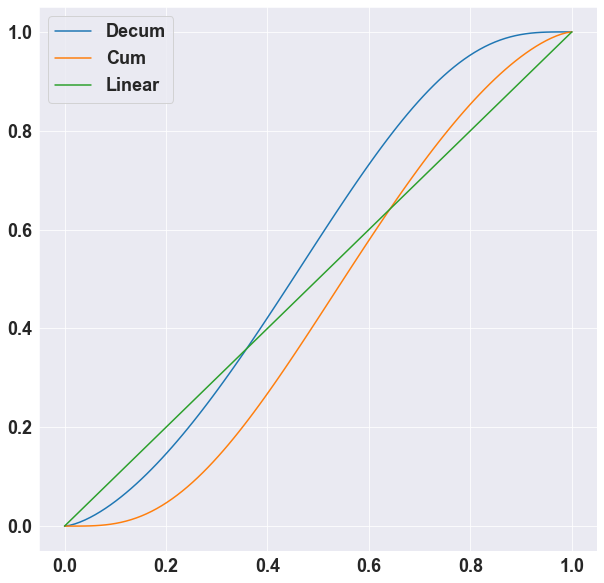

In [34]:
fig,ax=plt.subplots()
h1=prelec2(1.5,1.5,reverse=True) #Gain Decumulative
h2=prelec2(1.5,1.5,reverse=False) #loss Cumulative
h3=prelec2(1,1,reverse=False)
h=cc([h1,h2,h3])
h.columns=['Decum','Cum','Linear']
h.plot(grid=True,ax=ax)


In [35]:
pltsize(5,5)
z=z3
def plotfunc(z0,name,label):
    alp=[]
    for i in range(143):    
        alp=alp+[z0[name][:,i].mean()]
    alp=frame(alp)
    alp.columns=[label]
    return alp

a=r'$\alpha$';b=r'$\beta$';L=r'$\lambda$';
r=r'$\rho$';r1=r'$\rho_G$';r2=r'$\rho_L$';r3=r'$\rho_M$'
d1=r'$\delta_1$';d2=r'$\delta_2$'
g1=r'$\gamma_1$';g2=r'$\gamma_2$'
om1=r'$\omega_{1G}$';om2=r'$\omega_{2G}$';om3=r'$\omega_{1L}$';om4=r'$\omega_{2L}$'
pie1=r'$\pi_G$';pie2=r'$\pi_L$'
eta=r'$\eta$'

V=[]
lab=[r1,r2,r3]
for j in range(3):
    v=[]
    for i in range(143):    
        v+=[z['scale_'][:,i,j].mean()]
    v=exp(frame(v))
    v.columns=[lab[j]]
    V+=[v]


10
13


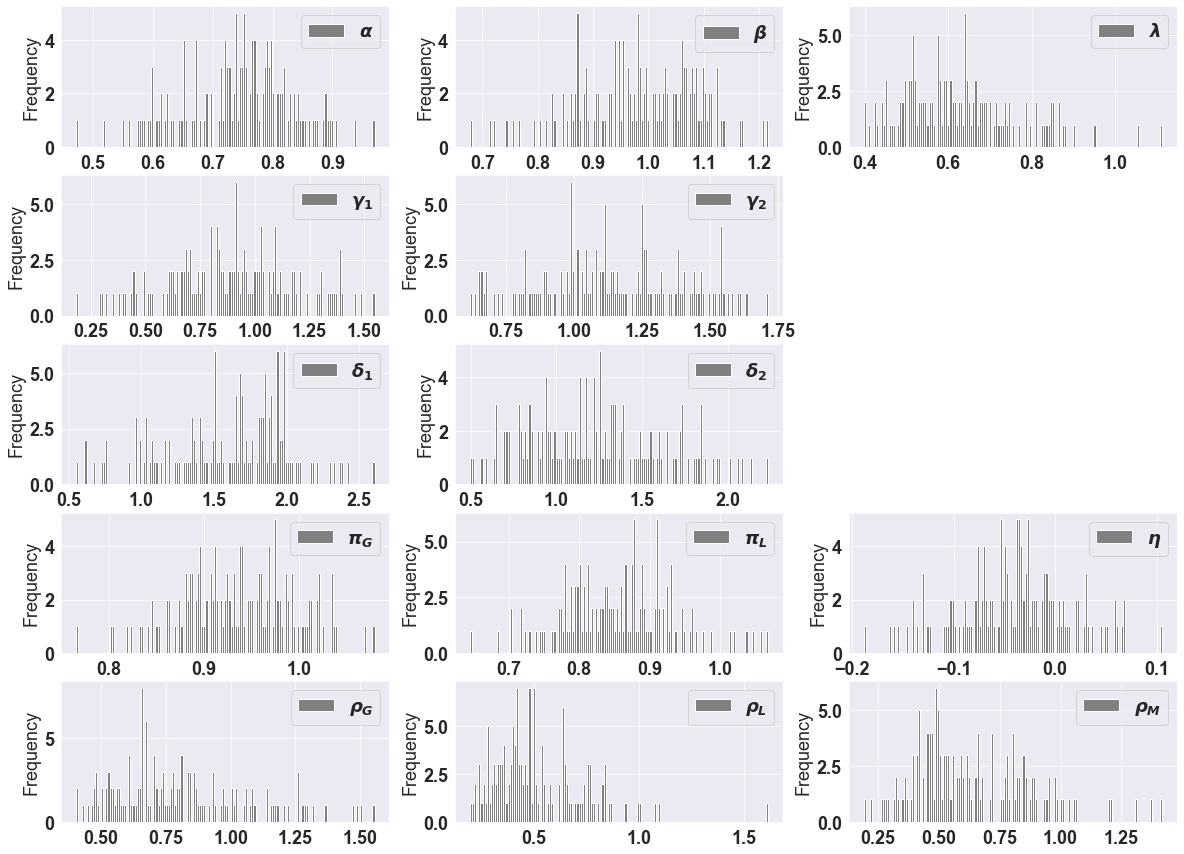

In [36]:
lst1=[ 'alpha_', 'beta_', 'lamda_', 'gama1_', 'gama2_','delta1_', 'delta2_', 'stbg_', 'stbl_',  'com_']
lst2=[ a, b, L, g1,g2,d1,d2,pie1,pie2,eta]

que=[]
for i,j in zip(lst1[:],lst2[:]):
    que+=[plotfunc(z,i,j)]
print(len(que))
for i in range(3):
    que+=[V[i]]
print(len(que))

pltsize(15,20)
fig,ax=plt.subplots(5,3)
i,j,k=0,0,0
for i in range(5):
    for j in range(3):
        if  i==1 and j==2:
            s=0
        else:
            if i==2 and j==2:
                s=0
            else:
                que[k].plot(kind='hist',bins=143,grid=True,ax=ax[i,j],color='gray')
                k=k+1
        
ax[1,2].remove() 
ax[2,2].remove() 

if saveplots:
    plt.savefig(dirout+'Fig6.png',facecolor=fig.get_facecolor())    

In [37]:
df=frame()
for i in range(len(que)):
    df=pd.concat([df,que[i]],axis=1)
    
sumary=cc([df.std(),df.min(),df.quantile([.05,.25,.5,.75,.95]).T,df.max()])
sumary.columns=['Sd','Min','5%','25%','50%','75%','95%','Max']
sumary=sumary.T
sumary[list(colsdf)[0:10]+list(colsdf)[14:]].T.round(3)

,Sd,Min,5%,25%,50%,75%,95%,Max
$\alpha$,0.091,0.471,0.587,0.683,0.751,0.798,0.888,0.971
$\beta$,0.105,0.678,0.804,0.910,0.985,1.064,1.124,1.217
$\lambda$,0.135,0.398,0.443,0.522,0.611,0.696,0.864,1.114
$\rho_G$,0.256,0.403,0.479,0.628,0.760,0.968,1.282,1.556
$\rho_L$,0.215,0.196,0.250,0.364,0.473,0.640,0.856,1.614
$\rho_M$,0.237,0.192,0.324,0.466,0.584,0.804,1.038,1.418
$\delta_1$,0.415,0.551,0.779,1.344,1.673,1.890,2.184,2.605
$\delta_2$,0.385,0.495,0.652,0.942,1.222,1.498,1.911,2.237
$\gamma_1$,0.280,0.184,0.409,0.696,0.900,1.080,1.366,1.547
$\gamma_2$,0.260,0.618,0.679,0.967,1.117,1.323,1.546,1.716


In [38]:
from scipy.stats import pearsonr
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
h=rho.round(2).astype(str) + p

In [39]:
h

,$\alpha$,$\beta$,$\lambda$,$\gamma_1$,$\gamma_2$,$\delta_1$,$\delta_2$,$\pi_G$,$\pi_L$,$\eta$,$\rho_G$,$\rho_L$,$\rho_M$
$\alpha$,1.0***,0.09,-0.05,0.0,-0.2**,-0.05,-0.05,0.11,0.03,0.03,0.21**,0.09,0.29***
$\beta$,0.09,1.0***,0.34***,0.17**,0.07,0.23***,-0.27***,-0.05,-0.27***,0.11,0.15*,-0.13,0.07
$\lambda$,-0.05,0.34***,1.0***,0.3***,0.11,0.08,0.3***,-0.18**,0.18**,0.01,0.39***,0.26***,0.22***
$\gamma_1$,0.0,0.17**,0.3***,1.0***,0.22***,0.43***,0.4***,-0.39***,-0.1,0.05,-0.07,-0.05,0.01
$\gamma_2$,-0.2**,0.07,0.11,0.22***,1.0***,0.33***,0.06,0.41***,-0.24***,0.23***,0.22***,0.22***,0.13
$\delta_1$,-0.05,0.23***,0.08,0.43***,0.33***,1.0***,0.39***,-0.11,-0.36***,0.23***,0.05,0.04,0.13
$\delta_2$,-0.05,-0.27***,0.3***,0.4***,0.06,0.39***,1.0***,-0.24***,0.23***,-0.01,0.01,0.23***,0.19**
$\pi_G$,0.11,-0.05,-0.18**,-0.39***,0.41***,-0.11,-0.24***,1.0***,-0.09,0.14*,0.14,0.04,0.15*
$\pi_L$,0.03,-0.27***,0.18**,-0.1,-0.24***,-0.36***,0.23***,-0.09,1.0***,-0.33***,0.04,0.05,0.1
$\eta$,0.03,0.11,0.01,0.05,0.23***,0.23***,-0.01,0.14*,-0.33***,1.0***,0.12,0.08,-0.0
